# **Random Forest를 이용한 Odor 분석**
---

## **I. Data (St, Log + St)**

In [2]:
import numpy as np
import pandas as pd

In [3]:
data_path = "/content/drive/Othercomputers/내 컴퓨터/라벨이 지정되지 않은 볼륨[F]/교수님/PLS 양돈 농가/데이터/"

In [4]:
### 원 데이터

st = pd.read_csv(data_path + "standardization.csv", encoding="euc-kr")
log_st = pd.read_csv(data_path + "log standardization.csv", encoding="euc-kr")

print(st.shape)
print(log_st.shape)

(57, 16)
(57, 16)


In [5]:
display(st.head())
display(np.round(st.describe(), 3))

,ou,nh3,h2s,mm,dms,dmds,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
0,-0.848614,-1.043712,-0.551739,-0.550900,0.013296,-0.265563,-0.924093,-1.008822,-0.970688,-1.041122,-0.792735,-0.606655,-0.552642,-0.948861,-0.644286,-0.276059
1,-0.848614,-1.031973,-0.137224,0.195296,7.377081,-0.265563,0.704742,1.739909,1.931804,2.029148,1.819390,1.413260,0.930918,0.811597,0.341523,1.153900
2,-0.750466,-0.963493,-0.688655,-0.552833,0.850984,-0.265563,0.239397,0.896196,0.972499,1.585714,0.960535,0.918987,0.078421,-0.086520,-0.429727,-0.098280
3,0.331813,-0.953710,-0.051809,-0.552833,0.016574,0.743575,-0.077997,0.455135,0.348527,1.209141,0.570515,0.152484,-0.227728,-0.175450,0.906914,0.556796
4,-0.841982,-0.922405,-0.132200,-0.552833,-0.195880,-0.265563,-0.236593,0.183595,0.132254,0.746936,0.477393,0.046927,-0.211107,-0.056110,-0.644286,0.193509


,ou,nh3,h2s,mm,dms,dmds,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
count,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000
mean,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000
std,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009
min,-0.981,-1.044,-0.858,-0.553,-0.196,-0.266,-0.980,-1.055,-1.021,-1.074,-0.810,-0.631,-0.702,-0.949,-0.644,-0.819
25%,-0.750,-0.746,-0.700,-0.553,-0.196,-0.266,-0.849,-0.850,-0.794,-0.928,-0.645,-0.534,-0.497,-0.737,-0.644,-0.579
50%,-0.384,-0.341,-0.243,-0.553,-0.196,-0.266,-0.322,-0.039,-0.075,-0.326,-0.216,-0.335,-0.211,-0.175,-0.395,-0.324
75%,0.332,0.713,0.232,0.079,-0.155,-0.266,0.648,0.283,0.263,0.663,0.300,0.054,0.078,0.312,0.342,0.194
max,3.392,3.198,3.490,4.083,7.377,5.514,3.517,4.529,4.884,3.548,5.328,5.540,6.036,5.199,5.752,5.824


In [6]:
display(log_st.head())
display(np.round(log_st.describe(), 3))

,ou,nh3,h2s,mm,dms,dmds,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
0,-1.235849,-2.061472,-0.363296,-0.638789,1.471740,-0.30591,-1.084505,-1.433378,-1.748890,-1.688962,-1.876210,-1.349337,-0.648372,-4.803546,-1.160738,0.177013
1,-1.235849,-1.954099,0.341793,1.064602,2.831587,-0.30591,0.773626,1.007934,1.310006,1.139025,1.363714,1.306571,1.099294,0.847229,0.905243,1.135620
2,-0.828202,-1.481942,-0.800714,-0.895866,2.081442,-0.30591,0.596986,0.793780,0.985959,1.042285,1.079080,1.139036,0.557274,0.369128,-0.054571,0.383262
3,0.732535,-1.428919,0.438363,-0.895866,1.477619,2.43485,0.432252,0.641083,0.677809,0.946513,0.900390,0.726255,0.192427,0.296225,1.214646,0.863764
4,-1.202516,-1.275205,0.347760,-0.895866,-0.715591,-0.30591,0.326605,0.522967,0.537397,0.804628,0.850307,0.638746,0.217629,0.392342,-1.160738,0.634518


,ou,nh3,h2s,mm,dms,dmds,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
count,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000
mean,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000
std,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009
min,-2.353,-2.061,-2.076,-0.896,-0.716,-0.306,-3.923,-4.198,-2.662,-3.656,-2.480,-3.380,-3.622,-4.804,-1.161,-1.951
25%,-0.828,-0.677,-0.848,-0.896,-0.716,-0.306,-0.621,-0.549,-0.746,-0.772,-0.591,-0.531,-0.421,-0.570,-1.161,-0.394
50%,-0.012,0.051,0.207,-0.896,-0.716,-0.306,0.260,0.405,0.376,0.247,0.299,0.138,0.218,0.296,0.031,0.110
75%,0.733,0.930,0.702,1.011,0.860,-0.306,0.755,0.569,0.625,0.775,0.744,0.645,0.557,0.624,0.905,0.635
max,1.921,1.822,1.950,1.642,2.832,3.889,1.310,1.420,1.884,1.389,1.975,1.976,2.142,1.685,2.207,2.062


## **II. Random Forest**

### **1. Def LOOCV**

In [7]:
def model_loocv(model, data) :
  from tqdm.notebook import tqdm

  predict = []
  real = []
  model = model

  for i in tqdm(range(data.shape[0])) :
    train = data.drop(data.index[i]) 
    test = pd.DataFrame(data.iloc[i, :]).T
  
    train_y = train.iloc[:, 0]
    train_X = train.iloc[:, 1:]

    test_y = test.iloc[:, 0].values
    test_X = test.iloc[:, 1:]


    model_fit = model(random_state = 0).fit(train_X, train_y)

    pred = model_fit.predict(test_X)[0]

    predict.append(pred)
    real.append(test_y[0])

  return {"predict" : predict, "real" : real}

In [8]:
from sklearn.ensemble import RandomForestRegressor

st_rf_result = model_loocv(model = RandomForestRegressor, data = st)
log_st_rf_result = model_loocv(model = RandomForestRegressor, data = log_st)

st_rf_real = st_rf_result["real"] ; st_rf_pred = st_rf_result["predict"]
log_st_rf_real = st_rf_result["real"] ; log_st_rf_pred = st_rf_result["predict"]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

St R2 :  0.175
Log St R2 :  0.175 



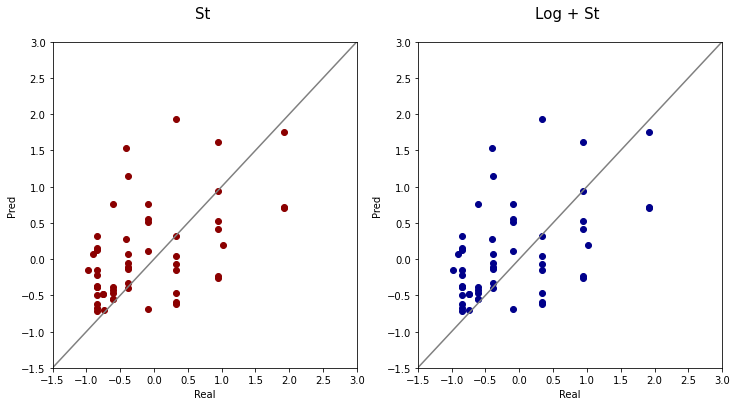

In [24]:
st_r2 = np.round(np.corrcoef(st_rf_real, st_rf_pred)[0, 1]**2, 3)
log_st_r2 = np.round(np.corrcoef(log_st_rf_real, log_st_rf_pred)[0, 1]**2, 3)

print("St R2 : ", st_r2)
print("Log St R2 : ", log_st_r2, "\n")

import matplotlib.pyplot as plt

plt.figure(figsize = (12, 6))

plt.subplot(1,2,1)
plt.scatter(st_rf_real, st_rf_pred, color = "darkred")
plt.plot([-1.5, 3], [-1.5, 3], color = "grey")
plt.xlabel("Real")  ; plt.ylabel("Pred")
plt.xlim(-1.5, 3); plt.ylim(-1.5, 3)
plt.title("St \n", fontsize = 15)

plt.subplot(1,2,2)
plt.scatter(log_st_rf_real, log_st_rf_pred, color = "darkblue")
plt.plot([-1.5, 3], [-1.5, 3], color = "grey")
plt.xlabel("Real")  ; plt.ylabel("Pred")
plt.xlim(-1.5, 3); plt.ylim(-1.5, 3)
plt.title("Log + St \n", fontsize = 15)

plt.show()

In [17]:
from sklearn.metrics import mean_squared_error as mse

def MAPE(y_true, y_pred) : 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

st_rmse = np.round(np.sqrt(mse(st_rf_real, st_rf_pred)))
log_st_rmse = np.round(np.sqrt(mse(log_st_rf_real, log_st_rf_pred)))

st_mape = np.round(MAPE(st_rf_real, st_rf_pred))
log_st_mape = np.round(MAPE(log_st_rf_real, log_st_rf_pred))

### **2. Def CV10**

In [18]:
def model_cv10(model, data) :
  from tqdm.notebook import tqdm
  from sklearn.metrics import mean_squared_error as mse

  predict = []
  real = []
  r2 = [] ; RMSE_list = []  ; MAPE_list = []
  model = model

  k = np.round(data.shape[0]/10).astype(int) 

  for i in tqdm(range(0, data.shape[0], k)) :
    
    if i + k <= data.shape[0] :
      idx = i + k
    else : 
      idx = data.shape[0]

    train = data.drop(data.index[i:idx]) 
    test = data.iloc[i:idx, :]
  
    train_y = train.iloc[:, 0]
    train_X = train.iloc[:, 1:]

    test_y = test.iloc[:, 0].values
    test_X = test.iloc[:, 1:]


    model_fit = model(random_state = 0).fit(train_X, train_y)

    pred = model_fit.predict(test_X)

    r = np.corrcoef(pred, test_y)[0,1]**2
    r2.append(r)
    
    RMSE = np.round(np.sqrt(mse(pred, test_y)))
    RMSE_list.append(RMSE)
    
    mape = np.round( np.mean(np.abs((np.array(test_y) - np.array(pred)) / np.array(test_y))) * 100 )
    MAPE_list.append(mape)

    [predict.append(pred[i]) for i in range(len(pred))]
    [real.append(test_y[i]) for i in range(len(test_y))]

  return {"predict" : predict, "real" : real, "R2" : r2, "RMSE" : RMSE_list, "MAPE" : MAPE_list}

In [19]:
from sklearn.ensemble import RandomForestRegressor

st_rf10_result = model_cv10(model = RandomForestRegressor, data = st)
log_st_rf10_result = model_cv10(model = RandomForestRegressor, data = log_st)

st_rf10_real = st_rf10_result["real"] ; st_rf10_pred = st_rf10_result["predict"]
log_st_rf10_real = st_rf10_result["real"] ; log_st_rf10_pred = st_rf10_result["predict"]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

St10 R2 :  0.173
Log St10 R2 :  0.173 



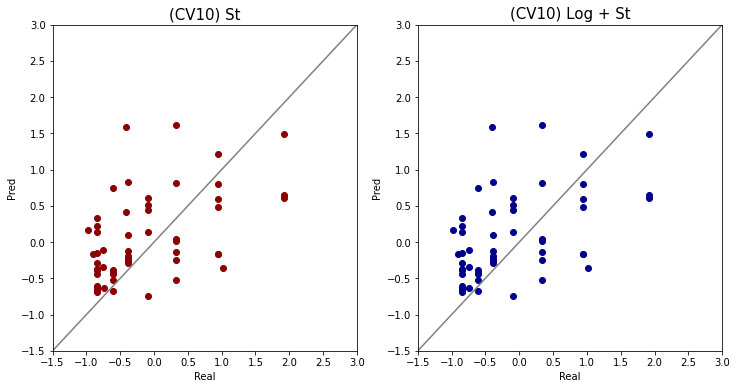

In [20]:
st10_r2 = np.round(np.corrcoef(st_rf10_real, st_rf10_pred)[0, 1]**2, 3)
log_st10_r2 = np.round(np.corrcoef(log_st_rf10_real, log_st_rf10_pred)[0, 1]**2, 3)

print("St10 R2 : ", st10_r2)
print("Log St10 R2 : ", log_st10_r2, "\n")


plt.figure(figsize = (12, 6))

plt.subplot(1,2,1)
plt.scatter(st_rf10_real, st_rf10_pred, color = "darkred")
plt.plot([-1.5, 3], [-1.5, 3], color = "grey")
plt.xlabel("Real")  ; plt.ylabel("Pred")
plt.xlim(-1.5, 3); plt.ylim(-1.5, 3)
plt.title("(CV10) St", fontsize = 15)

plt.subplot(1,2,2)
plt.scatter(log_st_rf10_real, log_st_rf10_pred, color = "darkblue")
plt.plot([-1.5, 3], [-1.5, 3], color = "grey")
plt.xlabel("Real")  ; plt.ylabel("Pred")
plt.xlim(-1.5, 3); plt.ylim(-1.5, 3)
plt.title("(CV10) Log + St", fontsize = 15)

plt.show()

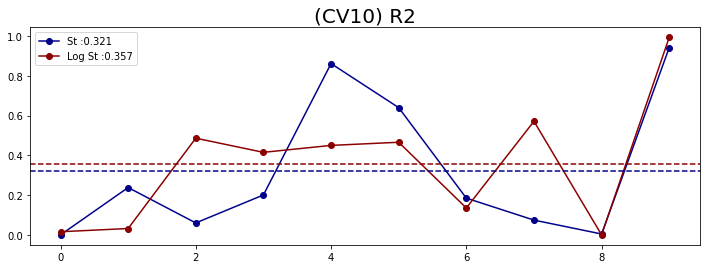

In [21]:
plt.figure(figsize = (12, 4))
plt.plot(st_rf10_result["R2"], marker = "o", color = "darkblue", label = "basic")
plt.plot(log_st_rf10_result["R2"], marker = "o", color = "darkred", label = "log")
plt.axhline(np.mean(st_rf10_result["R2"]), color = "darkblue", linestyle = "--")
plt.axhline(np.mean(log_st_rf10_result["R2"]), color = "darkred", linestyle = "--")
st_cv_mean = np.round(np.mean(st_rf10_result["R2"]), 3)
log_st_cv_mean = np.round(np.mean(log_st_rf10_result["R2"]), 3)
plt.legend(loc = "upper left", labels = ["St :" + str(st_cv_mean), "Log St :" + str(log_st_cv_mean)])
plt.title("(CV10) R2", fontsize = 20)
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error as mse

st10_rmse = np.mean(st_rf10_result["RMSE"])
log_st10_rmse = np.mean(log_st_rf10_result["RMSE"])

st10_mape = np.mean(st_rf10_result["MAPE"])
log_st10_mape = np.mean(log_st_rf10_result["MAPE"])

### **Result**

In [23]:
R2 = pd.DataFrame([st_r2, log_st_r2, st_cv_mean, log_st_cv_mean], 
                  index = ["St", "Log + St", "St 10", "Log + St 10"], columns = ["R2"]).T

RMSE = pd.DataFrame([st_rmse, log_st_rmse, st10_rmse, log_st10_rmse], 
                     index = ["St", "Log + St", "St 10", "Log + St 10"], columns = ["RMSE"]).T

MAPE = pd.DataFrame([st_mape, log_st_mape, st10_mape, log_st10_mape], 
                     index = ["St", "Log + St", "St 10", "Log + St 10"], columns = ["MAPE"]).T

results = pd.concat([R2, RMSE, MAPE], axis = 0)
results

,St,Log + St,St 10,Log + St 10
R2,0.175,0.175,0.321,0.357
RMSE,1.000,1.000,0.900,0.900
MAPE,148.000,148.000,136.500,450.900
